## Data Validation: Comparing Raw and Cleaned Cafe Sales Data

In this section, we will validate the data in `dirty_cafe_sales` by comparing it with the cleaned dataset `cleaned_cafe_sales`. We will check for missing values, data types, duplicate records, and outliers to ensure the integrity of the data.

In [26]:
# Load raw and cleaned datasets
import pandas as pd
import numpy as np

raw_df = pd.read_csv(r"../data/dirty_cafe_sales.csv")
clean_df = pd.read_csv(r"../data/cleaned_cafe_sales.csv")

print(f"Raw dataset shape: {raw_df.shape}")
print(f"Cleaned dataset shape: {clean_df.shape}")

Raw dataset shape: (10000, 8)
Cleaned dataset shape: (10000, 8)


### Data Types Comparison

Check that columns have the expected data types after cleaning.

In [22]:
# Compare data types in raw and cleaned data
print("Raw data types:\n", raw_df.dtypes)
print("\nCleaned data types:\n", clean_df.dtypes)

Raw data types:
 Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Cleaned data types:
 Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object


### Duplicate Records Check

Count the number of duplicate rows in both datasets.

In [24]:
# Count duplicate rows
dup_raw = raw_df.duplicated().sum()
dup_clean = clean_df.duplicated().sum()
print(f"Duplicate rows in raw data: {dup_raw}")
print(f"Duplicate rows in cleaned data: {dup_clean}")

Duplicate rows in raw data: 0
Duplicate rows in cleaned data: 0


### Missing Values Comparison

Let's compare the number of missing values in each column before and after cleaning.

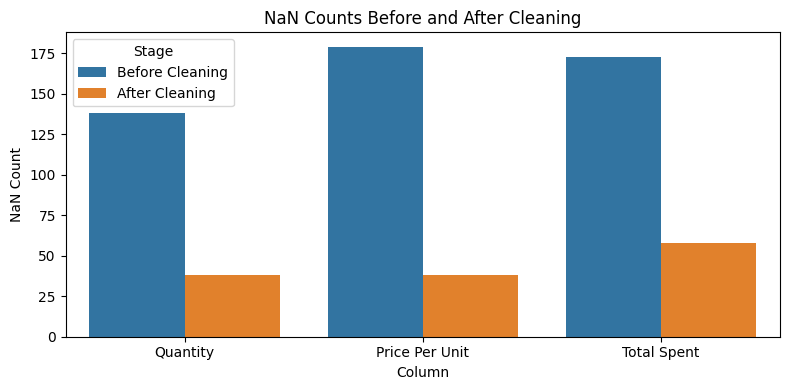

<Figure size 640x480 with 0 Axes>

In [ ]:
# Comparative bar plot: NaN counts before and after numeric conversion
import seaborn as sns
import matplotlib.pyplot as plt

nan_counts_before = [raw_df['Quantity'].isna().sum(), raw_df['Price Per Unit'].isna().sum(), raw_df['Total Spent'].isna().sum()]
nan_counts_after = [clean_df['Quantity'].isna().sum(), clean_df['Price Per Unit'].isna().sum(), clean_df['Total Spent'].isna().sum()]

nan_compare_df = pd.DataFrame({
    'Column': ['Quantity', 'Price Per Unit', 'Total Spent'],
    'Before Cleaning': nan_counts_before,
    'After Cleaning': nan_counts_after
})

nan_compare_df_melted = nan_compare_df.melt(id_vars='Column', var_name='Stage', value_name='NaN Count')

plt.figure(figsize=(8,4))
sns.barplot(data=nan_compare_df_melted, x='Column', y='NaN Count', hue='Stage')
plt.title('NaN Counts Before and After Cleaning')
plt.tight_layout()
plt.show()


### Pie Charts Comparing Location Values Before and After Cleaning

The pie charts below compare the distribution of unique `Location` values in the raw dataset (`df`) and the cleaned dataset (`df_clean`). 

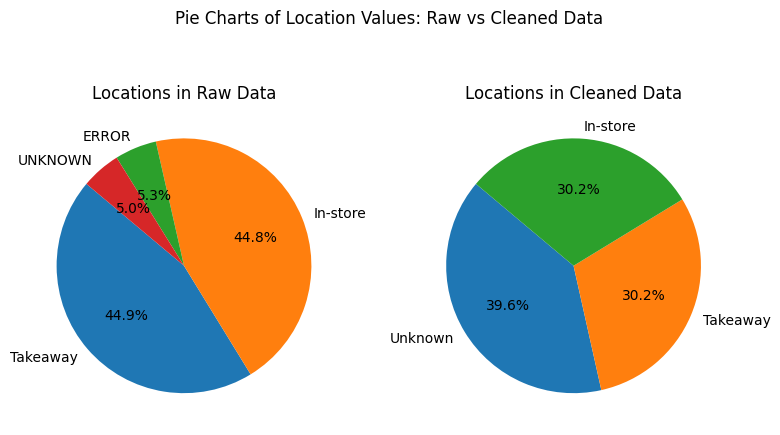

In [5]:
# Pie charts to compare unique Location values in raw_df and clean_df
location_counts_raw = raw_df['Location'].value_counts()
location_counts_clean = clean_df['Location'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Raw data pie chart
axes[0].pie(location_counts_raw, labels=location_counts_raw.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Locations in Raw Data")

# Cleaned data pie chart
axes[1].pie(location_counts_clean, labels=location_counts_clean.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Locations in Cleaned Data")

plt.suptitle("Pie Charts of Location Values: Raw vs Cleaned Data")
plt.tight_layout()
plt.show()

### Visualize Payment Methods before vs after Standarization

The donut chart below displays the distribution of all payment method values found in the raw vs processed dataset after standarization

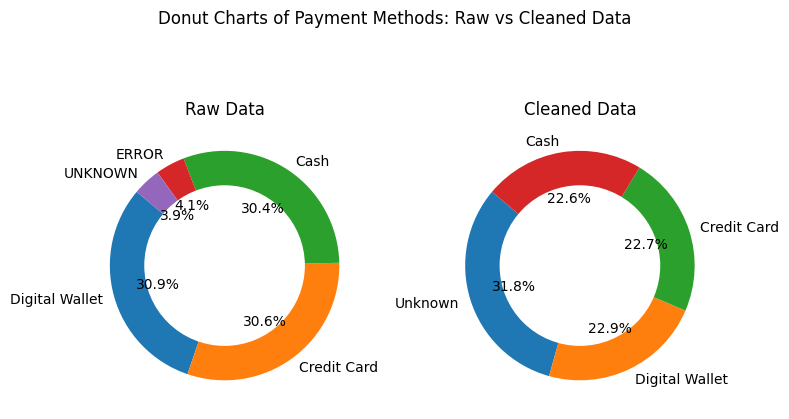

In [6]:
# Show donut charts for payment methods in raw and cleaned data side by side

payment_counts_raw = raw_df['Payment Method'].value_counts()
payment_counts_clean = clean_df['Payment Method'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Raw data donut chart
wedges1, texts1, autotexts1 = axes[0].pie(payment_counts_raw, labels=payment_counts_raw.index, autopct='%1.1f%%', startangle=140)
centre_circle1 = plt.Circle((0,0),0.70,fc='white')
axes[0].add_artist(centre_circle1)
axes[0].set_title("Raw Data")

# Cleaned data donut chart
wedges2, texts2, autotexts2 = axes[1].pie(payment_counts_clean, labels=payment_counts_clean.index, autopct='%1.1f%%', startangle=140)
centre_circle2 = plt.Circle((0,0),0.70,fc='white')
axes[1].add_artist(centre_circle2)
axes[1].set_title("Cleaned Data")

plt.suptitle("Donut Charts of Payment Methods: Raw vs Cleaned Data")
plt.tight_layout()
plt.show()

### Consistency of 'Total Spent' Calculation

The bar chart below compares the number of rows in the raw and cleaned datasets where the value in the `'Total Spent'` column does **not** match the product of `'Quantity'` and `'Price Per Unit'`

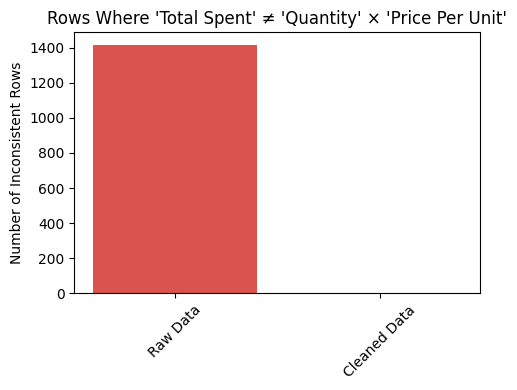

In [15]:
# Comparative bar chart: Consistency of 'Total Spent' calculation in raw vs cleaned data

# Calculate inconsistent rows in raw data
raw_inconsistent = ~np.isclose(
    pd.to_numeric(raw_df['Total Spent'], errors='coerce'),
    pd.to_numeric(raw_df['Quantity'], errors='coerce') * pd.to_numeric(raw_df['Price Per Unit'], errors='coerce'),
    equal_nan=True
)
num_raw_inconsistent = raw_inconsistent.sum()

# Calculate inconsistent rows in cleaned data
clean_inconsistent = ~np.isclose(
    clean_df['Total Spent'],
    clean_df['Quantity'] * clean_df['Price Per Unit'],
    equal_nan=True
)
num_clean_inconsistent = clean_inconsistent.sum()

# Bar chart comparison
plt.figure(figsize=(5,4))
plt.bar(['Raw Data', 'Cleaned Data'], [num_raw_inconsistent, num_clean_inconsistent], color=['#d9534f', '#5cb85c'])
plt.ylabel("Number of Inconsistent Rows")
plt.title("Rows Where 'Total Spent' ≠ 'Quantity' × 'Price Per Unit'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

## Check for Outliers 

Assess the dataset for outliers in Numerical Columns of the dataframe

In [21]:
# Check for outliers (values > 99th percentile) in all numeric columns

numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numeric_cols:
    q99_orig = pd.to_numeric(raw_df[col], errors='coerce').quantile(0.99)
    q99_clean = clean_df[col].quantile(0.99)
    outliers_orig = (pd.to_numeric(raw_df[col], errors='coerce') > q99_orig).sum()
    outliers_clean = (clean_df[col] > q99_clean).sum()
    print(f"99th percentile of {col} in df: {q99_orig}")
    print(f"99th percentile of {col} in clean_df: {q99_clean}")
    print(f"Number of {col} outliers in df:", outliers_orig)
    print(f"Number of {col} outliers in clean_df:", outliers_clean)


99th percentile of Quantity in df: 5.0
99th percentile of Quantity in clean_df: 5.0
Number of Quantity outliers in df: 0
Number of Quantity outliers in clean_df: 0
99th percentile of Price Per Unit in df: 5.0
99th percentile of Price Per Unit in clean_df: 5.0
Number of Price Per Unit outliers in df: 0
Number of Price Per Unit outliers in clean_df: 0
99th percentile of Total Spent in df: 25.0
99th percentile of Total Spent in clean_df: 25.0
Number of Total Spent outliers in df: 0
Number of Total Spent outliers in clean_df: 0
